<a href="https://colab.research.google.com/github/heejjj/Heart_Attact_Predict/blob/main/Heart_Attack_Analysis_%26_Prediction_IQR%2BMin_Max_23_04_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ROCAUC
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv('/content/drive/MyDrive/kaggle/Heart Attack Analysis & Prediction Dataset/heart.csv')


In [3]:
#Using log transformation
df["age"]= np.log(df.age)
df["trtbps"]= np.log(df.trtbps)
df["chol"]= np.log(df.chol)
df["thalachh"]= np.log(df.thalachh)
print("---Log Transform performed---")

#Outliners again
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=df[continuous_cols]

for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))
        

---Log Transform performed---
Column age outliers = 1 => 0.33%
Column trtbps outliers = 9 => 2.97%
Column chol outliers = 6 => 1.98%
Column thalachh outliers = 6 => 1.98%
Column oldpeak outliers = 8 => 2.64%


In [4]:
X = df.drop("output", axis=1)

In [5]:
y = df['output']

In [6]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=65)

In [7]:
MM_scaler = MinMaxScaler()
X_train = MM_scaler.fit_transform(X_train)
X_test = MM_scaler.fit_transform(X_test)

##XGBoost

In [8]:
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance

In [9]:
#Train set
model_xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 42,  learning_rate= 0.03, n_jobs=5)
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_train)
xgb = accuracy_score(y_train, pred_xgb)
print(xgb)

0.9917355371900827


In [10]:
#Test set
model_xgb = XGBClassifier(max_depth= 8, n_estimators= 125, random_state= 42,  learning_rate= 0.03, n_jobs=5)
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)
xgb = accuracy_score(y_test, pred_xgb)
print(xgb)

0.9016393442622951


<Axes: >

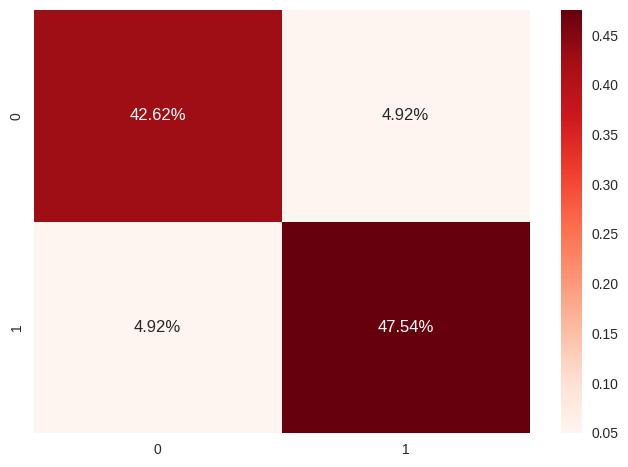

In [11]:
cm_xgb = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cm_xgb/np.sum(cm_xgb), annot = True, fmt=  '0.2%', cmap = 'Reds')

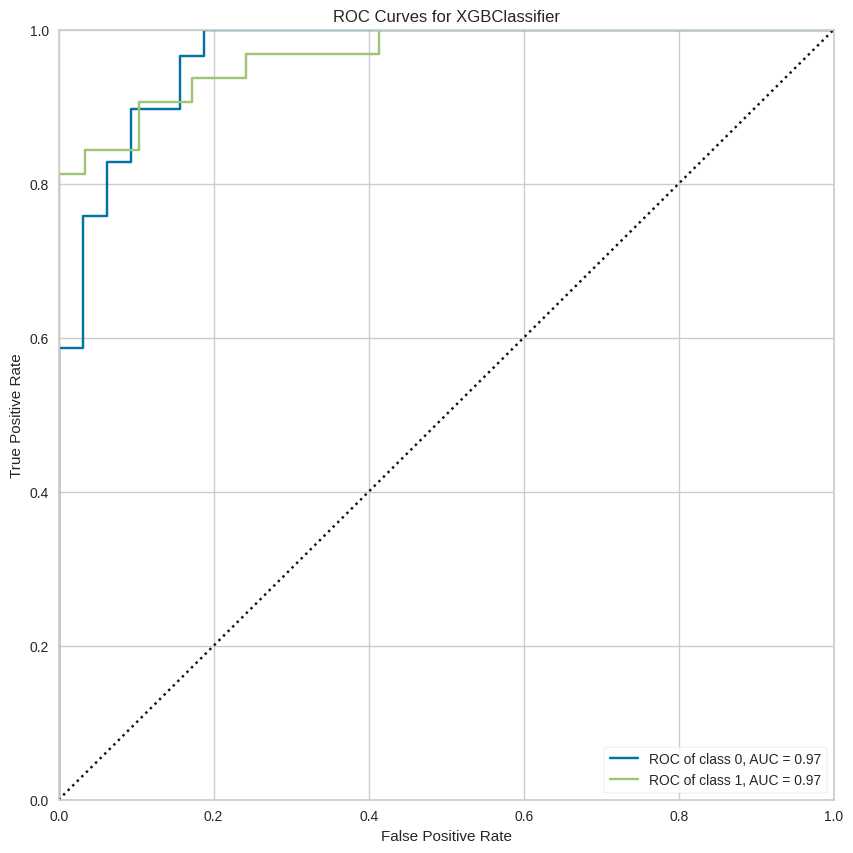

<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [12]:
fig,ax= plt.subplots(figsize=(10,10))
roc_viz= ROCAUC(model_xgb,micro=False,macro=False, classes=["0", "1"])
roc_viz.fit(X_train,y_train)
roc_viz.score(X_test, y_test)
roc_viz.show()

<Axes: title={'center': 'Feature Importance'}, xlabel='Importance', ylabel='Features'>

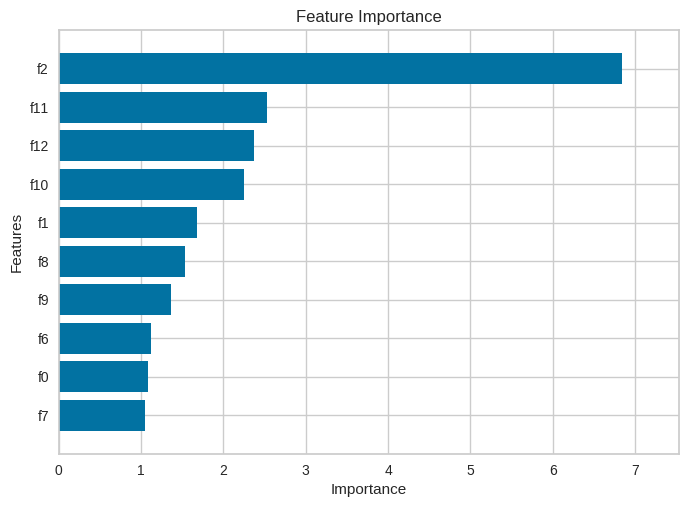

In [13]:
# feature importance 시각화
plot_importance(model_xgb, height=0.8, max_num_features=10, xlabel="Importance", 
                ylabel="Features", title="Feature Importance", show_values=False, importance_type='gain')

In [14]:
# !pip install shap

In [15]:
# #XGBoost Shap value

# import shap

# # SHAP explainer 생성
# explainer = shap.Explainer(model_xgb)

# # SHAP values 계산
# shap_values = explainer(X_train)

# # 모델 예측에 대한 SHAP 요약값 계산
# shap.summary_plot(shap_values, X_train)

# # 개별 샘플에 대한 SHAP 값 계산
# shap_values_single = explainer(X_train.iloc[0:1])

# # 개별 샘플에 대한 SHAP 값 시각화
# shap.plots.waterfall(shap_values_single[0], max_display=10)

##Kneighbor

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
#Train Set
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)
model_kn.fit(X_train, y_train)
pred_kn = model_kn.predict(X_train)
kn = accuracy_score(y_train, pred_kn)
print(kn)


0.8553719008264463


In [18]:
#Test Set
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)
model_kn.fit(X_train, y_train)
pred_kn = model_kn.predict(X_test)
kn = accuracy_score(y_test, pred_kn)
print(kn)


0.9016393442622951


<Axes: >

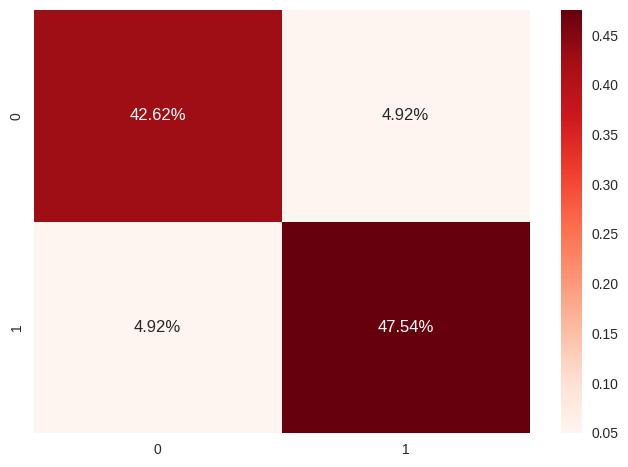

In [19]:
cm_kn = confusion_matrix(y_test, pred_kn)
sns.heatmap(cm_kn/np.sum(cm_kn), annot = True, fmt=  '0.2%', cmap = 'Reds')

##SVC

In [20]:
from sklearn.svm import SVC, LinearSVC

In [21]:
#Train set
model_svm = SVC(kernel='rbf', random_state = 42)
model_svm.fit(X_train, y_train)
pred_svm = model_svm.predict(X_train)
sv = accuracy_score(y_train, pred_svm)
print(sv)

0.8677685950413223


In [22]:
#Test set
model_svm = SVC(kernel='rbf', random_state = 42)
model_svm.fit(X_train, y_train)
pred_svm = model_svm.predict(X_test)
sv = accuracy_score(y_test, pred_svm)
print(sv)

0.9016393442622951


<Axes: >

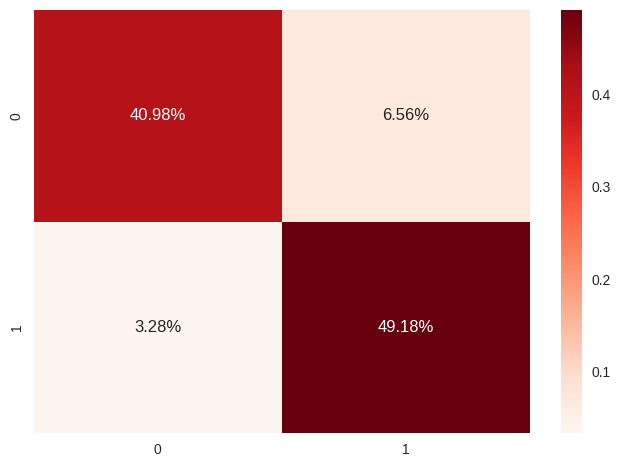

In [23]:
cm_sv = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm_sv/np.sum(cm_sv), annot = True, fmt=  '0.2%', cmap = 'Reds')

##Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
#Train set
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_train)
rf = accuracy_score(y_train, pred_rf)
print(rf)

0.8099173553719008


In [26]:
#Test set
model_rf = RandomForestClassifier(n_estimators=300,min_samples_leaf=0.16, random_state=42)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
rf = accuracy_score(y_test, pred_rf)
print(rf)

0.9344262295081968


<Axes: >

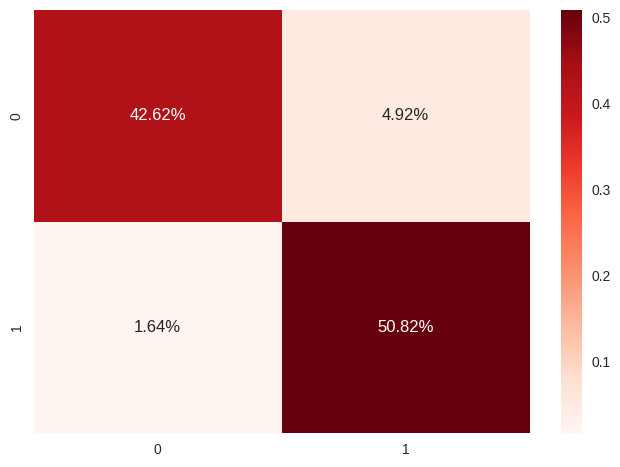

In [27]:
cm_rf = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm_rf/np.sum(cm_rf), annot = True, fmt=  '0.2%', cmap = 'Reds')

##Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
#Train set
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)
model_dt.fit(X_train,y_train)
pred_dt = model_dt.predict(X_train)
dt = accuracy_score(y_train, pred_dt)
print(dt)

0.859504132231405


In [30]:
#Test set
model_dt = DecisionTreeClassifier( max_depth=4, random_state=42)
model_dt.fit(X_train,y_train)
pred_dt = model_dt.predict(X_test)
dt = accuracy_score(y_test, pred_dt)
print(dt)

0.8032786885245902


<Axes: >

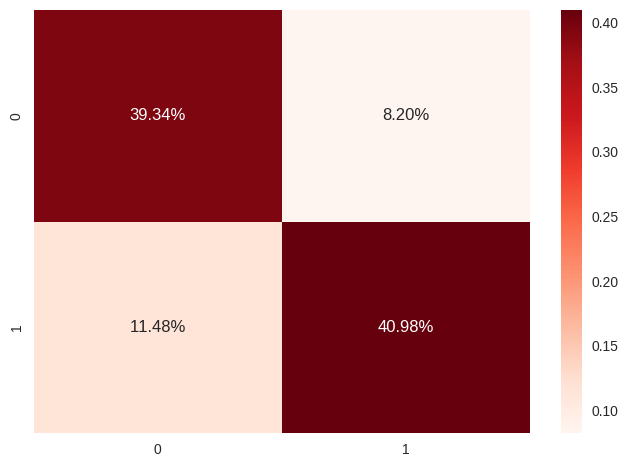

In [31]:
cm_dt = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm_dt/np.sum(cm_dt), annot = True, fmt=  '0.2%', cmap = 'Reds')

##Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
#Train set
model_lg = LogisticRegression(max_iter=120,random_state=42, n_jobs=20)
model_lg.fit(X_train, y_train)
pred_lg = model_lg.predict(X_test)
lg = accuracy_score(y_test, pred_lg)
print(lg)

0.9016393442622951


In [34]:
#Test set
model_lg = LogisticRegression(max_iter=120,random_state=42, n_jobs=20)
model_lg.fit(X_train, y_train)
pred_lg = model_lg.predict(X_test)
lg = accuracy_score(y_test, pred_lg)
print(lg)

0.9016393442622951


<Axes: >

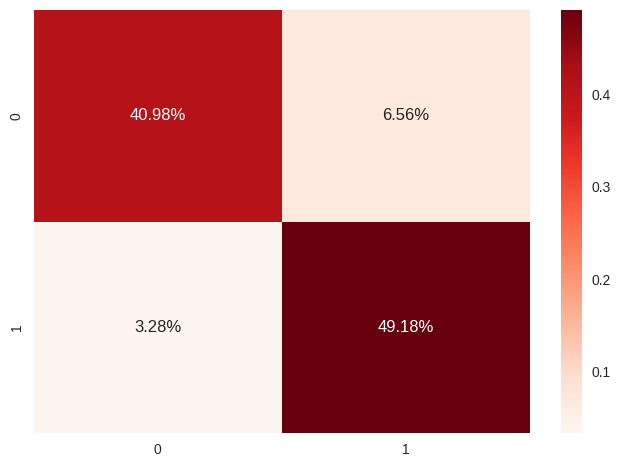

In [35]:
cm_lg = confusion_matrix(y_test, pred_lg)
sns.heatmap(cm_lg/np.sum(cm_lg), annot = True, fmt=  '0.2%', cmap = 'Reds')

,Model,Accuracy_score
2,Random Forest,0.934426
0,Logistic Regression,0.901639
3,XGBoost,0.901639
4,KNeighbours,0.901639
5,SVC,0.901639
1,Decision Tree,0.803279


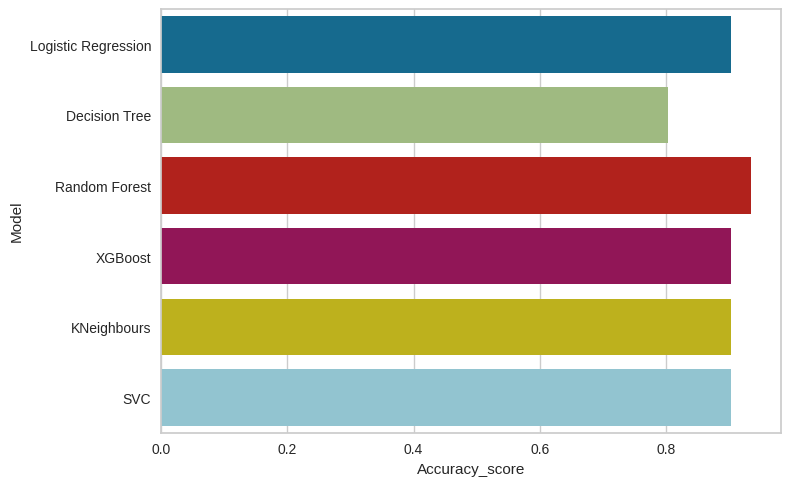

In [36]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNeighbours', 'SVC'],
    'Accuracy_score' :[lg, dt, rf, xgb, kn, sv]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)